<a href="https://colab.research.google.com/github/Aroubaz/Advanced-Database-Master2/blob/master/TensorflowANDKerasinit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist #28x28 images of hand written digits 0-9

(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              ) 

model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9251
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1048 - accuracy: 0.9682
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0718 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0535 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9869


In [20]:
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9722
0.08903572708368301 0.9721999764442444


In [22]:
model.save('degit_test_model.model')

INFO:tensorflow:Assets written to: degit_test_model.model/assets


In [23]:
new_model = tf.keras.models.load_model('degit_test_model.model')

In [27]:
predictions = new_model.predict(x_test)
print(predictions)

[[2.68821684e-11 3.47796032e-08 2.62339142e-07 ... 9.99993920e-01
  1.05450391e-10 2.31066701e-06]
 [2.46474591e-10 1.08393986e-04 9.99891162e-01 ... 3.12426300e-11
  1.13555565e-09 6.37665355e-16]
 [1.43193589e-07 9.99756873e-01 8.64462345e-06 ... 7.74673244e-05
  1.11149944e-04 2.46728291e-07]
 ...
 [1.57538357e-11 6.48201240e-06 5.60087983e-11 ... 2.51550614e-06
  1.83190476e-08 2.30593216e-07]
 [6.82093574e-12 1.38090508e-08 3.50174556e-09 ... 1.54085853e-07
  1.42967583e-05 3.57639890e-10]
 [1.63808381e-05 6.00512422e-08 3.80487222e-07 ... 1.23577065e-10
  3.95049142e-07 1.60499447e-09]]


In [28]:
import numpy as np
print(np.argmax(predictions[0]))

7


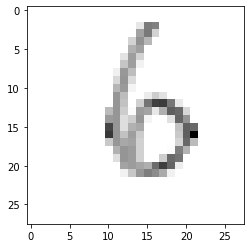

In [11]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1990],cmap=plt.cm.binary) #cmap to show on black and white
plt.show()